In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
 

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
X_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [4]:
 # Convert images from shape (32, 32, 3, num_samples) to (num_samples, 32, 32, 3)
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)

In [5]:
  # Correct the labels where '10' represents digit '0'
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [6]:
# Normalize the pixel values (0 to 255 -> 0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
X_train[0]

array([[[0.12941177, 0.11764706, 0.14901961],
        [0.05882353, 0.09019608, 0.07450981],
        [0.05882353, 0.06666667, 0.07450981],
        ...,
        [0.28235295, 0.25490198, 0.21960784],
        [0.32156864, 0.3019608 , 0.22352941],
        [0.34901962, 0.30980393, 0.23137255]],

       [[0.10980392, 0.15294118, 0.13725491],
        [0.05490196, 0.09803922, 0.08627451],
        [0.05490196, 0.07843138, 0.06666667],
        ...,
        [0.15686275, 0.15294118, 0.19607843],
        [0.2627451 , 0.22745098, 0.20392157],
        [0.3254902 , 0.30588236, 0.23529412]],

       [[0.15686275, 0.16078432, 0.14901961],
        [0.07058824, 0.08235294, 0.10196079],
        [0.0627451 , 0.06666667, 0.09019608],
        ...,
        [0.09019608, 0.11372549, 0.1764706 ],
        [0.13725491, 0.16470589, 0.17254902],
        [0.28235295, 0.27058825, 0.20784314]],

       ...,

       [[0.3372549 , 0.31764707, 0.29411766],
        [0.34117648, 0.32156864, 0.2784314 ],
        [0.32156864, 0

In [8]:
 # One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [9]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu" ),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu" ),
    tf.keras.layers.Dense(10, activation="softmax")  
    # 10 classes for digit classification
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,595,530 (21.35 MB)

 Trainable params: 5,595,530 (21.35 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model (assuming the data X_train, y_train is loaded and preprocessed)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9478 - loss: 0.1836 - val_accuracy: 0.8956 - val_loss: 0.4102
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9496 - loss: 0.1716 - val_accuracy: 0.8923 - val_loss: 0.4213
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9529 - loss: 0.1603 - val_accuracy: 0.8964 - val_loss: 0.4258
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9563 - loss: 0.1469 - val_accuracy: 0.8965 - val_loss: 0.4802
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9603 - loss: 0.1361 - val_accuracy: 0.8932 - val_loss: 0.4742
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9635 - loss: 0.1270 - val_accuracy: 0.8940 - val_loss: 0.5036
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9645 - loss: 0.1223 - val_accuracy: 0.8959 - val_loss: 0.5040
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9657 - loss: 

In [15]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


814/814 - 3s - 4ms/step - accuracy: 0.8913 - loss: 0.5796
Test Loss: 0.5795841217041016
Test Accuracy: 0.891287624835968


814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1744
           1       0.94      0.93      0.93      5099
           2       0.97      0.90      0.93      4149
           3       0.85      0.85      0.85      2882
           4       0.92      0.91      0.91      2523
           5       0.90      0.87      0.89      2384
           6       0.83      0.87      0.85      1977
           7       0.88      0.92      0.90      2019
           8       0.85      0.82      0.83      1660
           9       0.77      0.90      0.83      1595

    accuracy                           0.89     26032
   macro avg       0.88      0.89      0.88     26032
weighted avg       0.89      0.89      0.89     26032



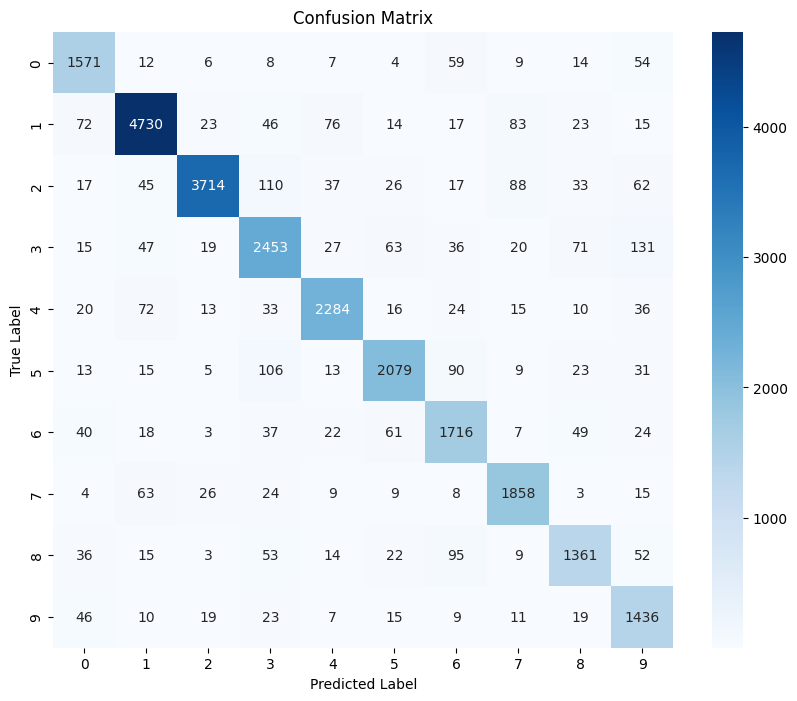

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
 
# Step 1: Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded true labels back to class labels

# Step 2: Classification report (accuracy, precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Step 3: Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


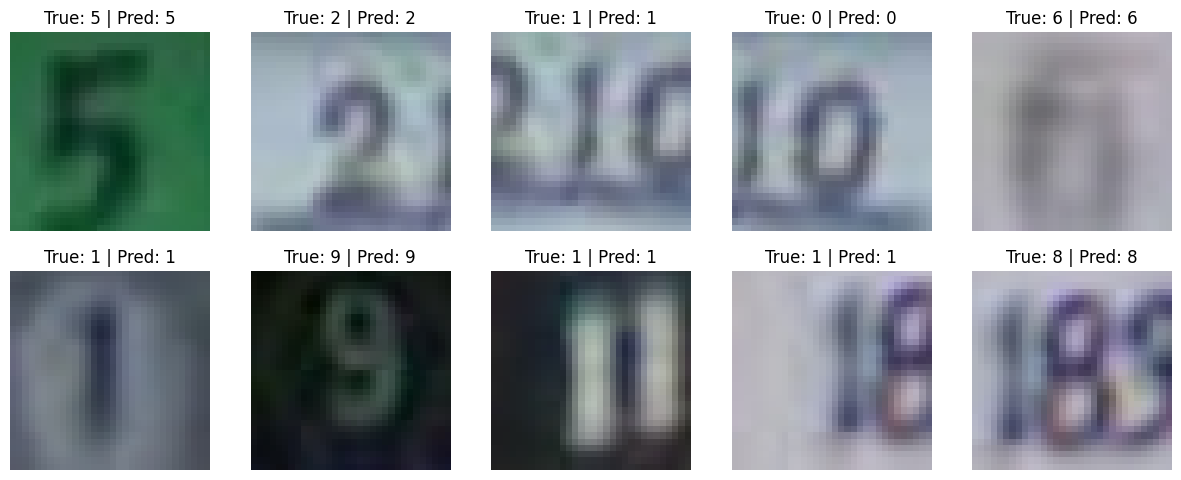

In [19]:
 

# Assuming X_test and y_test are already preprocessed
# Predict on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Plotting a few images and displaying their predicted vs. actual labels
def plot_images(X, true_labels, pred_labels, num_images=10):
    plt.figure(figsize=(15, 15))
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[i])
        plt.title(f"True: {true_labels[i]} | Pred: {pred_labels[i]}")
        plt.axis('off')

    plt.show()

# Call the function to plot
plot_images(X_test, true_classes, predicted_classes, num_images=10)
